#### Package Import

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [32]:
# Load dataset
data = pd.read_csv('Data/customer_churn.csv')

### Data Understanding

In [33]:
# Data Understanding
data.head()

,customer_id,gender,age,location_type,tenure,partner,dependent,phone_service,multi_line,internet_service,...,device_protection,tech_support,streaming_tv,paperless_billing,streaming_movie,payment_method,contract_type,monthly_charges,total_charges,churn
0,1,Male,59,Urban,6,Yes,No,No,Yes,None,...,Yes,No Internet Service,No,Yes,No,Electronic check,Two year,82.571303,495.427816,1
1,2,Female,38,Rural,8,No,No,Yes,No,DSL,...,No,No Internet Service,No Internet Service,Yes,No,Electronic check,Month-to-month,45.016283,360.130262,0
2,3,Male,54,Urban,24,Yes,No,No,Yes,None,...,Yes,No Internet Service,Yes,Yes,No,Credit card,Two year,63.609950,1526.638792,0
3,4,Male,44,Urban,7,Yes,Yes,Yes,No,Fibre Optics,...,Yes,Yes,No,No,Yes,Electronic check,One year,65.777708,460.443956,0
4,5,Male,46,Rural,21,Yes,No,No,No,None,...,No,No,No Internet Service,Yes,No,Mail check,Month-to-month,46.437305,975.183409,0


In [34]:
#checking the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        8000 non-null   int64  
 1   gender             8000 non-null   object 
 2   age                8000 non-null   int64  
 3   location_type      8000 non-null   object 
 4   tenure             8000 non-null   int64  
 5   partner            8000 non-null   object 
 6   dependent          8000 non-null   object 
 7   phone_service      8000 non-null   object 
 8   multi_line         8000 non-null   object 
 9   internet_service   8000 non-null   object 
 10  online_security    8000 non-null   object 
 11  online_backup      8000 non-null   object 
 12  device_protection  8000 non-null   object 
 13  tech_support       8000 non-null   object 
 14  streaming_tv       8000 non-null   object 
 15  paperless_billing  8000 non-null   object 
 16  streaming_movie    8000 

In [35]:
#checking the data statistics
data.describe()

,customer_id,age,tenure,monthly_charges,total_charges,churn
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,40.851375,12.464875,69.862364,872.980111,0.267750
std,2309.54541,13.433516,6.905540,19.746450,560.641958,0.442814
min,1.00000,18.000000,1.000000,-8.800168,-26.392111,0.000000
25%,2000.75000,29.000000,6.000000,56.575638,405.326574,0.000000
50%,4000.50000,41.000000,13.000000,69.699959,805.225076,0.000000
75%,6000.25000,52.000000,18.000000,83.012243,1255.480680,1.000000
max,8000.00000,64.000000,24.000000,145.203105,3076.377427,1.000000


### Data Preparation

In [36]:
# Drop the redundant customer ID
data1 = data.drop(['customer_id'], axis=1)

In [37]:
#Replace missing values on the TotalCharges with nan
data1['total_charges'] = data1['total_charges'].replace(' ', np.nan)

#Drop nan
data1 = data1.dropna()

In [38]:
#replace 1 with Yes and 0 with No on the churn column
data1['churn'] = data1['churn'].replace({'Yes': 1, 'No': 0})

In [39]:
# create a LabelEncoder object
le = LabelEncoder()

In [40]:
#Creating a list of categorical Features
cat_features = ['gender', 'location_type', 'partner','dependent','phone_service','multi_line','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','paperless_billing','streaming_movie','payment_method','contract_type']

In [41]:
# apply the LabelEncoder to each categorical feature
for feature in cat_features:
    data1[feature] = le.fit_transform(data1[feature])

In [42]:
#separating the variables into target(y) and features(X)
X = data1.drop(['churn'], axis=1)
y = data1['churn']

In [43]:
#spliting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train.head()

,gender,age,location_type,tenure,partner,dependent,phone_service,multi_line,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,paperless_billing,streaming_movie,payment_method,contract_type,monthly_charges,total_charges
3836,1,34,1,2,1,0,0,0,0,2,1,0,2,2,1,2,2,2,55.797220,111.594440
6408,0,33,1,18,1,1,0,1,1,1,1,1,2,0,0,0,0,2,71.442186,1285.959353
4840,0,49,1,2,1,1,1,0,1,1,0,1,1,2,0,0,0,0,71.082751,142.165502
527,0,51,1,12,1,1,0,0,1,1,0,0,2,1,0,1,1,0,60.166087,721.993041
6105,0,21,1,14,0,0,1,2,2,1,2,0,2,2,0,0,0,1,53.471001,748.594018


In [45]:
#Scaling the data to reduce wide variations
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Exploratory Data Analysis

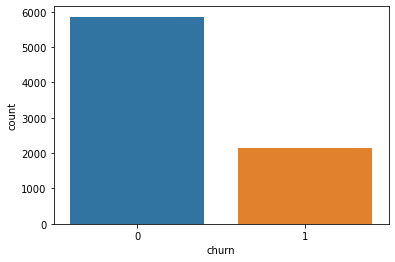

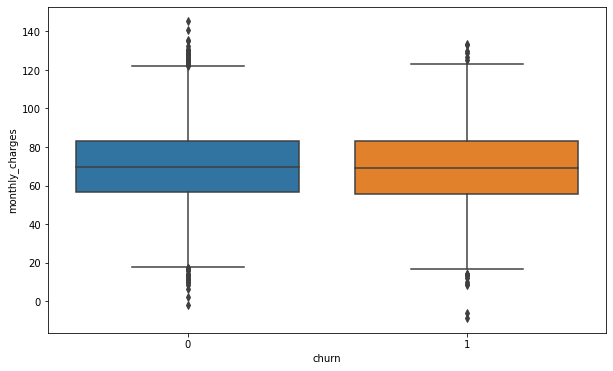

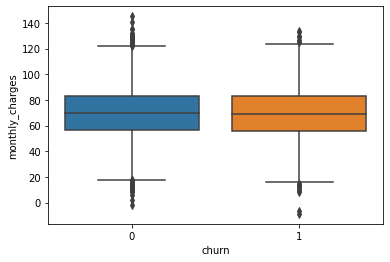

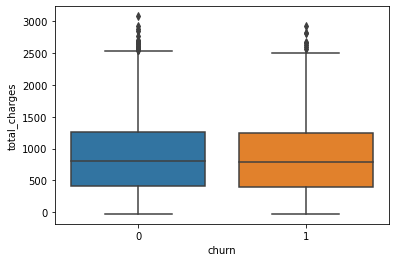

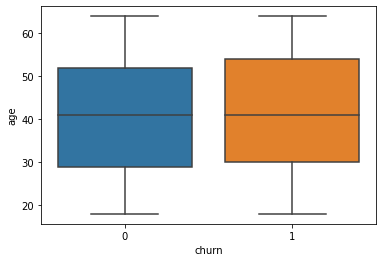

In [48]:
sns.countplot(x='churn', data=data1)
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='monthly_charges', data=data1)
plt.show()
sns.boxplot(x='churn', y='monthly_charges', data=data1)
plt.show()
sns.boxplot(x='churn', y='total_charges', data=data1)
plt.show()
sns.boxplot(x='churn', y='age', data=data1)
plt.show()

### Model Selection

In [49]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [50]:
# Predictive Modelling
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

### Model Evaluation

In [51]:
    print(name)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))

XGBoost
Accuracy: 0.705
Precision: 0.26506024096385544
Recall: 0.0859375
F1 score: 0.12979351032448377


### Model Deployment

In [52]:
best_model = XGBClassifier()
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)